(sec:introduccion_Sympy)=
# Introducción a SymPy

Las variables simbólicas son aquellas que permiten calcular límites, derivadas, integrales, etc., como se hace habitualmente en las clases de matemáticas. Para poder hacer estas operaciones, habituales en un curso de Cálculo, es preciso tener instalada la libraría **SymPy**.

Este módulo no trabaja con una estructura de datos basada en números (ya sean de tipo entero o doble) sino que trabaja con objetos que poseen atributos y métodos que tratan de reproducir el comportamiento matemático de variables, funciones, regiones, ecuaciones, etc., con las que se trabaja habitualmente en las disciplinas de álgebra y cálculo diferencial e integral.

Para emplear directamente este guión de prácticas desde una instalación de Python con *Anaconda*, basta con hacer clic en la aplicación 'Jupyter notebook' que ya está instalada por defecto (para más detalles: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html). Para instalar *Anaconda* en vuestro sistema operativo, entrad en el siguiente link: https://docs.anaconda.com/anaconda/install.

## Objetivos:

- Usar variables y expresiones simbólicas.
- Representar gráficamente regiones en el plano.
- Definir funciones de varias variables.


## Instalación y carga del módulo

Para tener disponible el módulo **SymPy**, hay que instalarlo usando la herramienta `pip` (o `conda` si utilizáis entornos de trabajo diferenciados). En el caso de usar *Microsoft Azute Notebooks* (https://notebooks.azure.com), se requiere la siguiente instalación:

In [1]:
!pip -q install sympy

Para disponer del módulo **SymPy** e importarlo para el resto del guión de prácticas, usaremos:

In [2]:
import sympy as sp

## Variables y expresiones simbólicas

### Variables simbólicas

Para trabajar en modo simbólico es necesario definir variables simbólicas y para hacer esto usaremos la función `sp.Symbol`. Veamos algunos ejemplos de su uso:

In [3]:
x = sp.Symbol('x') # define la variable simbólica x
y = sp.Symbol('y') # define la variable simbólica y
f_exp = 3*x + 5*y # ahora tenemos definida la expresion simbólica f_exp
print(f_exp)

a, b, c = sp.symbols('a:c') # define como simbólicas las variables a, b, c
expresion = a**3 + b**2 + c
print(expresion)

3*x + 5*y
a**3 + b**2 + c


Por claridad en la implementación y en los cálculos, será habitual que el nombre de la variable simbólica y el nombre del objeto **SymPy** en el que se almacena coincidan, pero esto no tiene porque ser así:

In [4]:
a = sp.Symbol('x')
print(a)
a.name

x


'x'

Debemos tener claro que ahora las variables `x` o `y`, definidas antes, no son números, ni tampoco pertenecen a los objetos definidos con el módulo **NumPy**, que estudiaremos más adelante. Todas las variables simbólicas son objetos de la clase `sp.Symbol`. Además, sus atributos y métodos, que podemos consultar tecleando la orden `dir(x)` o `dir(y)`, son completamente diferentes a las variables numéricas y vectores que veremos de **NumPy**.

Con **SymPy** se pueden definir constantes enteras o números racionales (todos de forma simbólica) de manera sencilla usando el comando `sp.Integer` o `sp.Rational`. Por ejemplo, podemos definir la constante simbólica $1/3$. Si hiciéramos lo mismo con números representados por defecto en Python, obtendríamos resultados muy diferentes. Observa también la diferencia que existe entre el tipo de dato asignado en el espacio de trabajo.

In [5]:
a = sp.Rational('1/3')
b = sp.Integer('1')/sp.Integer('3')
c = 1/3
d = 1.0/3.0
print(a)
print(b)
print(c)
print(d)
print(type(a))
print(type(b))
print(type(c))
print(type(d))

1/3
1/3
0.3333333333333333
0.3333333333333333
<class 'sympy.core.numbers.Rational'>
<class 'sympy.core.numbers.Rational'>
<class 'float'>
<class 'float'>


Otra forma sencilla de manejar valores constantes mediante objetos del módulo **SymPy** es usar la función `sp.S`. Una vez hechos todos los cálculos simbólicos, si precisamos obtener el valor numérico, utilizaremos la función `sp.N` o bien directamente `float`:

In [6]:
a = sp.S(2)
b = sp.S(6)
c = a/b
d = sp.N(c)
e = float(c)
print(type(a))
print(type(b))
print(type(c))
print(type(d))
print(type(e))
print(c)
print(d)
print('{0:.15f}'.format(e))

<class 'sympy.core.numbers.Integer'>
<class 'sympy.core.numbers.Integer'>
<class 'sympy.core.numbers.Rational'>
<class 'sympy.core.numbers.Float'>
<class 'float'>
1/3
0.333333333333333
0.333333333333333


A lo largo del curso, usaremos asiduamente dos números reales que se pueden definir como constantes simbólicas: $\pi$ y el número $e$. De la misma manera, para operar con variables o constantes simbólicas, debemos utilizar funciones que sean capaces de manipular este tipo de objetos, todas ellas implementadas en el módulo **SymPy** (por ejemplo, `sp.sin`, `sp.cos`, `sp.log`, etc.).

In [7]:
p = sp.pi # definición de la constante pi
print(sp.cos(p))

e = sp.E # definición del número e
print(sp.log(e))

-1
1


### Suposiciones sobre las variables

Cuando se define una variable simbólica se le puede asignar cierta información adicional sobre el tipo de valores que puede alcanzar, o las suposiciones que se le van a aplicar. Por ejemplo, podemos decidir antes de hacer cualquier cálculo si la variable toma valores enteros o reales, si es positiva o negativa, mayor que un cierto número, etc. Este tipo de información se añade en el momento de la definición de la variable simbólica como un argumento opcional.

In [8]:
x = sp.Symbol('x', nonnegative = True) # La raíz cuadrada de un número no negativo es real
y = sp.sqrt(x)
print(y.is_real)

x = sp.Symbol('x', integer = True) # La potencia de un número entero es entera
y = x**sp.S(2)
print(y.is_integer)

a = sp.Symbol('a')
b = sp.sqrt(a)
print(b.is_real)

a = sp.Symbol('a')
b = a**sp.S(2)
print(b.is_integer)

True
True
None
None


Puesto que los cálculos simbólicos son consistentes en **SymPy**, también se pueden hacer comprobaciones sobre si algunas desigualdades son ciertas o no, siempre y cuando se tenga cuidado en las suposiciones que se hagan al definir las variables simbólicas.

In [9]:
x = sp.Symbol('x', real = True)
p = sp.Symbol('p', positive = True)
q = sp.Symbol('q', real = True)
y = sp.Abs(x) + p # El valor absoluto
z = sp.Abs(x) + q
print(y > 0)
print(z > 0)

True
q + Abs(x) > 0


### Expresiones simbólicas

De la misma manera que el módulo **SymPy** nos permite definir variables simbólicas, también podemos definir expresiones matemáticas a partir de estas, así como factorizarlas, expandirlas, simplificarlas, o incluso imprimirlas de una forma similar a como lo haríamos con lápiz y papel.

In [10]:
x, y = sp.symbols('x,y', real=True)
expr = (x-3)*(x-3)**2*(y-2)
expr_long = sp.expand(expr) # Expandir expresión

print(expr_long) # Imprimir de forma estándar
sp.pprint(expr_long) # Imprimir de forma semejante a con lápiz y papel

expr_short = sp.factor(expr)
print(expr_short) # Factorizar expresión

expr = -3+(x**2-6*x+9)/(x-3)
expr_simple = sp.simplify(expr) # Simplificar expresión
sp.pprint(expr)
print(expr_simple)

x**3*y - 2*x**3 - 9*x**2*y + 18*x**2 + 27*x*y - 54*x - 27*y + 54
 3        3      2         2                            
x ⋅y - 2⋅x  - 9⋅x ⋅y + 18⋅x  + 27⋅x⋅y - 54⋅x - 27⋅y + 54
(x - 3)**3*(y - 2)
      2          
     x  - 6⋅x + 9
-3 + ────────────
        x - 3    
x - 6


Una expresión en **SymPy** también se puede manipular, sustituyendo unas variables simbólicas por otras o incluso reemplazando las variables simbólicas por constantes. Para hacer este tipo de sustituciones, se utiliza la función `subs` y los valores a utilizar en la sustitución vienen definidos por un diccionario de Python:

In [11]:
x, y = sp.symbols('x,y', real=True)
expr = x*x + x*y + y*x + y*y
res = expr.subs({x:1, y:2}) # Sustitutición de las variables simbólicas por constantes
print(res)

expr_sub = expr.subs({x:1-y}) # Sustitución de la variable simbólica por una expresión
sp.pprint(expr_sub)
print(sp.simplify(expr_sub))

9
 2                        2
y  + 2⋅y⋅(1 - y) + (1 - y) 
1


### Resolución de ecuaciones

Dada una expresión en **SymPy**, podemos resolver ecuaciones de forma sencilla. Para ello, utilizaremos la función `solve`. Por ejemplo, veamos como resolver la ecuación $x^2 = 1$.  

In [12]:
x = sp.symbols('x',real=True)
expr = x**2 - 1
sol = sp.solve(expr,x) # Resolución de la ecuación respecto a x
print(sol)

[-1, 1]


A su vez, también podemos utilizar `solve` para despejar una variable. Por ejemplo, veamos como despejar $z$ de la ecuación $x^2 + 4z = 2y$.

In [13]:
x, y, z = sp.symbols('x:z',real=True)
expr = x**2 - 2*y + 4*z
f_exp = sp.solve(expr,z)
sp.pprint(f_exp)

⎡   2    ⎤
⎢  x    y⎥
⎢- ── + ─⎥
⎣  4    2⎦


### **Ejercicio** 

Convierte en coordenadas cilíndricas y esféricas las siguientes ecuaciones:

- $x^2 + y^2 + z^2 = 4$ (esfera).
- $y^2 + z^2 = 4x$ (superficie de revolución).

In [14]:
# ESCRIBE AQUÍ TU CÓDIGO

### **Ejercicio** 

Dada la ecuación implícita o general del plano $3x + 8y - 2z = 19$, obten la expresión de la función $f(x,y)$ tal que $z = f(x,y)$.  


In [15]:
# ESCRIBE AQUÍ TU CÓDIGO

## Representación gráfica

La representación gráfica es una de las herramientas más potentes para explorar datos. Hoy en día, es una de las tareas más importantes tanto para ingenieros como científicos. De hecho, los gráficos se utilizan tanto para exponer como para entender datos y comprobar visualmente resultados calculados.

### Regiones en el plano

Para representar gráficamente un conjunto de puntos o bien una región, utilizaremos la instrucción `plot_implicit`. Para ello, podemos utilizar como argumento una igualdad o una desigualdad. Además, también podemos incluir los operadores lógicos `sp.And` o `sp.Or`.

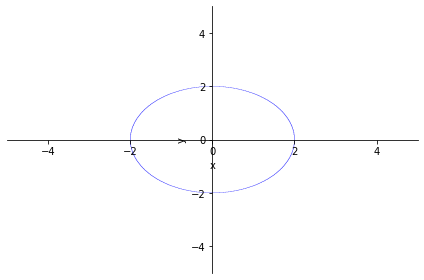

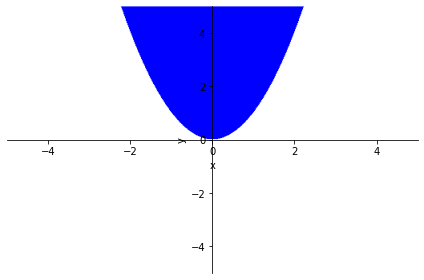

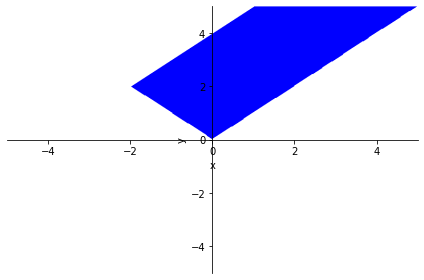

In [16]:
x, y = sp.symbols('x:y', real=True)
p1 = sp.plot_implicit(sp.Eq(x**2 + y**2, 4)) # Con una igualdad: circunferencia centrada en el origen y radio 2
p2 = sp.plot_implicit(y > x**2) # Con una desigualdad
p3 = sp.plot_implicit(sp.And(sp.And(y > x, y > -x), y < x + 4)) # Con el operador lógico sp.And

### **Ejercicio** 

Representa gráficamente las siguientes regiones o conjuntos en el plano:
- El conjunto de puntos que satisfacen $x^2+y^2-4x-6y = -9$.
- La región del plano de los puntos que cumplen $y>x$ o $y<-2x$.
- La región del plano de los puntos que están en el interior de un paralelogramo de vértices $(0,0)$, $(0,1)$, $(1,1)$ y $(1,2)$.

In [17]:
# ESCRIBE AQUÍ TU CÓDIGO

Para más detalles sobre representación gráfica en **SymPy**, se puede consultar la documentación oficial: https://docs.sympy.org/latest/modules/plotting.html.

## Funciones de varias variables

Para definir funciones en **SymPy**, tenemos que utilizar la función `sp.Lambda`. Además, para evaluar la función en un punto, procedemos como en cualquier otra función predefinida (seno, coseno, exponencial, etc.).

In [18]:
x, y = sp.symbols('x:y',real=True)
f_exp = x**2 + x*y
f = sp.Lambda((x,y),f_exp) # Creamos la función 
print('f(2,0) =',f(2,0)) # Evaluamos la función en el punto (2,0)
print(f(x,y)==f_exp)

f(2,0) = 4
True


### **Ejercicio** 

Calcula $f(3,3)$ y $g(1,0,0)$, donde las funciones $f$ y $g$ vienen dadas por las siguientes expresiones:

- $\displaystyle f(x,y) = \frac{\sqrt{x^2+y^2-9}}{x}$.
- $\displaystyle g(x,y,z) = \frac{x}{\cos(y^2+z^2)}$.

In [19]:
# ESCRIBE AQUÍ TU CÓDIGO